# Clustering Assignment


## Problem Statement - 
### HELP international NGO wants to spend their fund by choosing countries who are in direst need of aid. For this purpose we need to cluster countries based on data which contains various factors by which these countries can be clustered such as (child_mort, exports, health,	imports, income, inflation, life_expec,	total_fer,	gdpp)

#### Steps of the assignment are classified as below-
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis

## 1) Read and understand the data

In [1]:
# filter warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# Read the data set

countries_df = pd.read_csv('Country-data.csv')
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Counting number of rows and columns

countries_df.shape

(167, 10)

In [5]:
# Looking for datatype and null values

countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Decribing stats

countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 2) Clean and Visualizing the data

#### In data dictionary it is mentioned that columns 'exports', 'health', 'imports' are given as percentage of gdpp. so let's convert them into values

In [7]:
countries_df['health'] = (countries_df['health']*countries_df['gdpp'])/100
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,41.9174,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,267.8950,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,185.9820,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,100.6050,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,735.6600,58.9,19100,1.44,76.8,2.13,12200


In [8]:
countries_df['imports'] = (countries_df['imports']*countries_df['gdpp'])/100
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
countries_df['exports'] = (countries_df['exports']*countries_df['gdpp'])/100
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [10]:
# check for null value percentage for each column

round(100*(countries_df.isnull().sum()/countries_df.shape[0]), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

**So we can see that there are no null values in the data.**

### Let's plot heatmap to see correlation among different columns

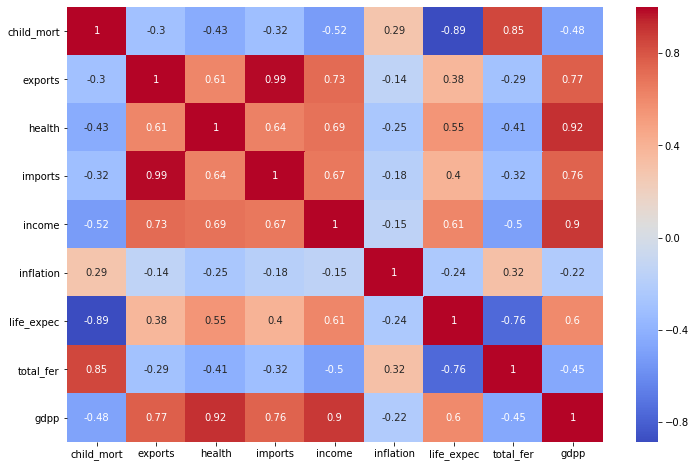

In [11]:
plt.figure(figsize = (12, 8))
sns.heatmap(countries_df.corr(), annot = True, cmap = 'coolwarm')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

1) It is clear and obvious that 'income' and 'gdpp' is highly correlated. That means countries having more net income per person have more gdpp

2) Child mortality rate increase as total fertality rate increases as they are positively correlated.

3) On other hand (total fertality, child mortality) rate of a country decrease as (gdpp, income) of a country increases as they are negatively correlated

4) Life expectancy increases as (total fertality, child mortality) rate of a country decreases

5) Imports and exports are highly correlated. More the imports more the exports of country.

6) 'Health', 'Income', 'gdpp' shows high negative correlation with child mortality.


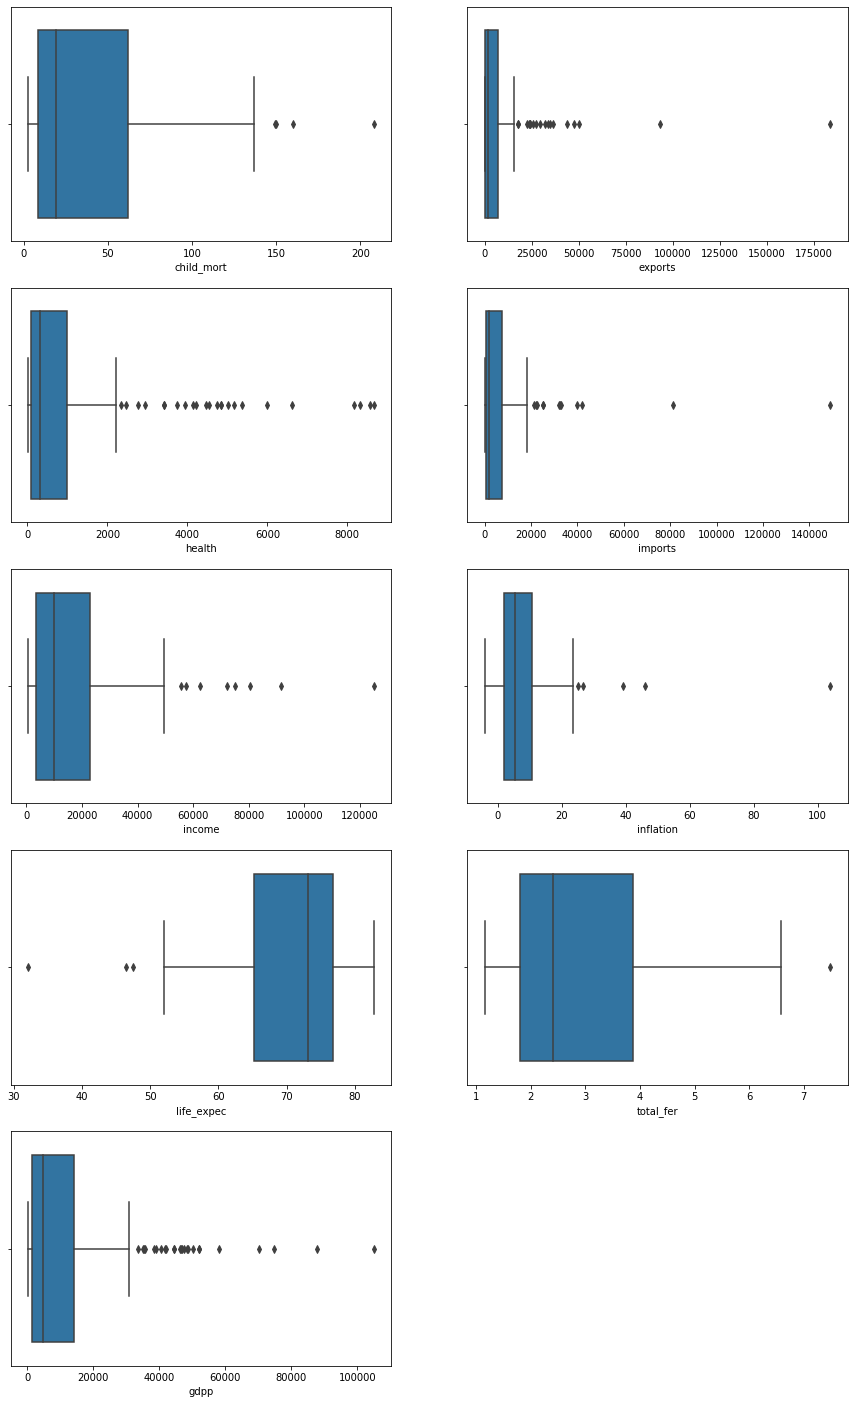

In [12]:
# understanding outliers
variables = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize = (15, 25))
for i in enumerate(variables):
    plt.subplot(5, 2, i[0]+1)
    sns.boxplot(countries_df[i[1]])

- As you can see there are so many outliers in almost all the variables, so it is necessary to cap them.
- Only life expectancy has outliers on lower side.
- For all other variables we will cap outliers from higher end.


## 3) Prepare data for modelling

### Outlier treatment

In [13]:
# capping outliers for 'child_mort'
q4 = countries_df['child_mort'].quantile(0.95)
countries_df['child_mort'][countries_df['child_mort']>=q4]=q4

# capping outliers for 'exports'
q4 = countries_df['exports'].quantile(0.95)
countries_df['exports'][countries_df['exports']>=q4]=q4

# capping outliers for 'health'
q4 = countries_df['health'].quantile(0.95)
countries_df['health'][countries_df['health']>=q4]=q4

# capping outliers for 'imports'
q4 = countries_df['imports'].quantile(0.95)
countries_df['imports'][countries_df['imports']>=q4]=q4

# capping outliers for 'income'
q4 = countries_df['income'].quantile(0.95)
countries_df['income'][countries_df['income']>=q4]=q4

# capping outliers for 'inflation'
q4 = countries_df['inflation'].quantile(0.95)
countries_df['inflation'][countries_df['inflation']>=q4]=q4

# capping outliers for 'life_expec'
q1 = countries_df['life_expec'].quantile(0.01)
q4 = countries_df['life_expec'].quantile(0.95)
countries_df['life_expec'][countries_df['life_expec']<=q1]=q1
countries_df['life_expec'][countries_df['life_expec']>=q4]=q4

# capping outliers for 'total_fer'
q4 = countries_df['total_fer'].quantile(0.95)
countries_df['total_fer'][countries_df['total_fer']>=q4]=q4

# capping outliers for 'gdpp'
q4 = countries_df['gdpp'].quantile(0.95)
countries_df['gdpp'][countries_df['gdpp']>=q4]=q4


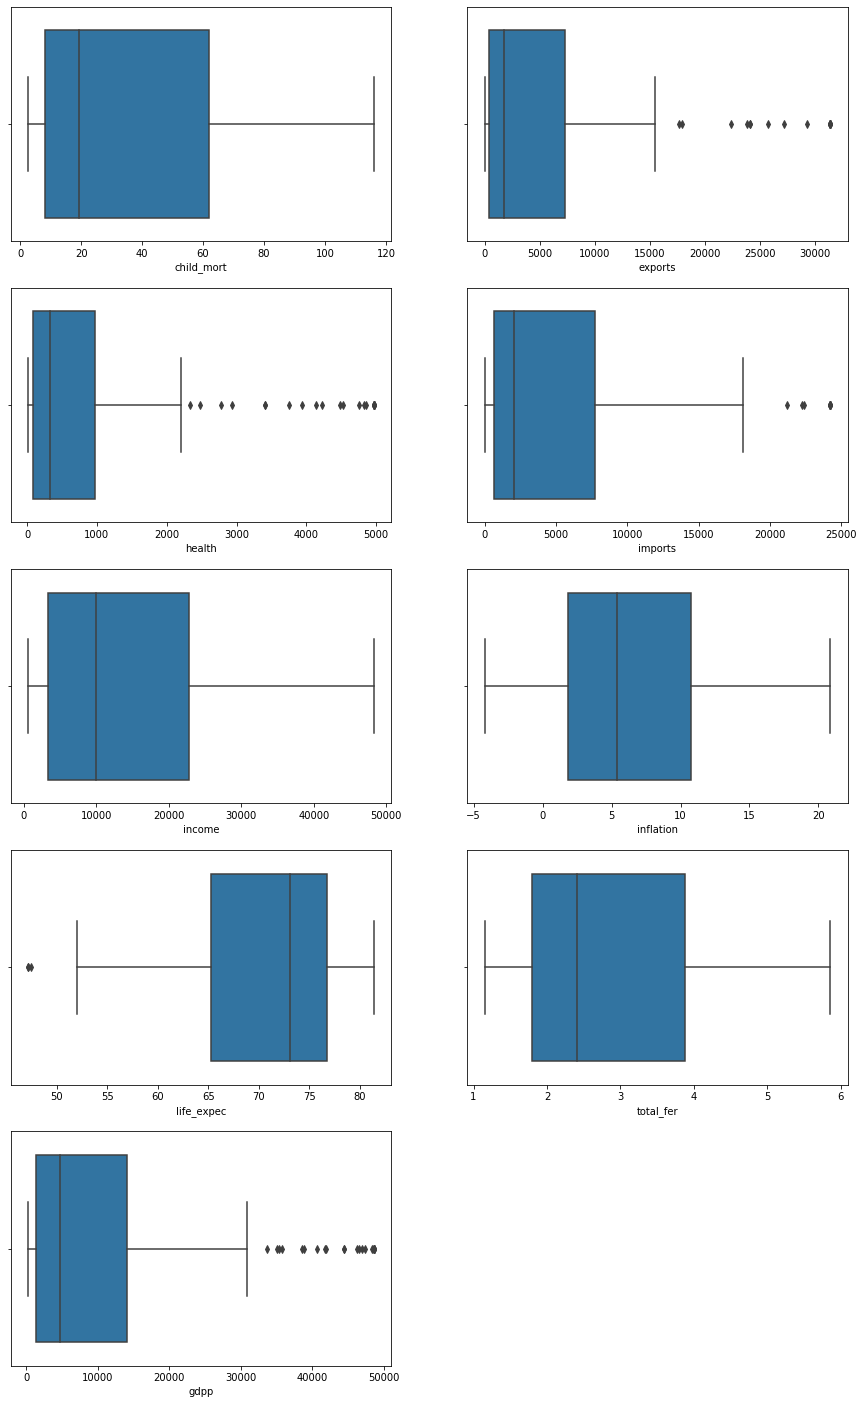

In [14]:
# checking for outliers again 

plt.figure(figsize = (15, 25))
for i in enumerate(variables):
    plt.subplot(5, 2, i[0]+1)
    sns.boxplot(countries_df[i[1]])

- Still there are some outliers in data, but we will keep it because if we remove them then we will lose important part of data

### Scaling of variables

In [15]:
countries_df.shape

(167, 10)

In [16]:
countries_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [17]:
# Using StandardScaler

countries_main = countries_df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]
Scaler = StandardScaler()
countries_scaled = Scaler.fit_transform(countries_main)
countries_scaled = pd.DataFrame(countries_scaled)
countries_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479341,-0.669581,-0.629435,-0.732729,-0.958349,0.394438,-1.697955,2.016421,-0.757362
1,-0.559029,-0.542172,-0.473489,-0.472182,-0.394006,-0.383226,0.669429,-0.880535,-0.523321
2,-0.262690,-0.475838,-0.530017,-0.560152,-0.192552,1.440750,0.692986,-0.019090,-0.498838
3,2.193878,-0.418960,-0.588935,-0.543087,-0.667360,2.190136,-1.238612,2.044904,-0.560376
4,-0.733509,-0.027134,-0.150685,0.306422,0.227992,-0.862393,0.728320,-0.547072,0.013312


### Hopskins score to check clustering tendency

In [18]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
hopkins(countries_scaled)

0.83109690030877

***As hopkins score is above 0.5, so data has good clustering tendency***

## 4) Model Buliding

### K-means clustering

#### Finding optimum number of clusters using:
#### 1. Elbow curve method

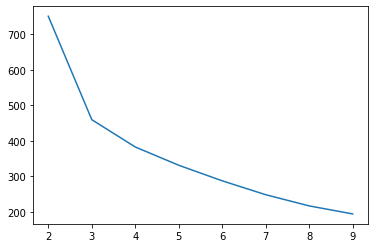

In [20]:
# SSD - sum of squared distances

ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(countries_scaled)
    ss.append([k, kmeans.inertia_ ])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

***From above elbow curve we should go with 3 clusters for our analysis but let's confirm it again by using silhouette score method also***

#### 2. Silhouette score method

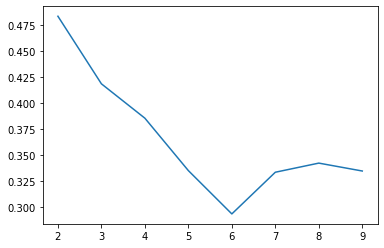

In [21]:
# using silhouette score method
ss = []
for k in range(2, 10):
    model = KMeans(n_clusters = k).fit(countries_scaled)
    ss.append([k, silhouette_score(countries_scaled, model.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

***Here silhoutte score for 2 cluster is high but as per business aspect creating 2 clusters is not a good idea, so we will go with second highest which is 3 clusters***

### Building model with 3 clusters

In [22]:
kmeans = KMeans(n_clusters =3, max_iter =50, random_state =100)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [23]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [24]:
countries_KM = countries_df.copy()

In [25]:
countries_KM['labels_K'] = kmeans.labels_
countries_KM.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_K
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0
3,Angola,116.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0


## 5.1) Final analysis using K-Means

In [26]:
countries_KM.labels_K.value_counts()

0    82
2    48
1    37
Name: labels_K, dtype: int64

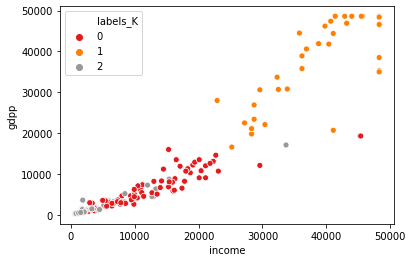

In [27]:
sns.scatterplot(x = "income" , y = "gdpp", hue = 'labels_K', data = countries_KM, palette = "Set1")

- so for cluster with label 2 falls under low income and low gdpp rate

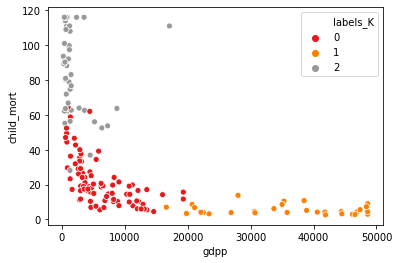

In [28]:
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'labels_K', data = countries_KM, palette = "Set1")

- cluster with label 2 has high child mortality rate for low gdpp

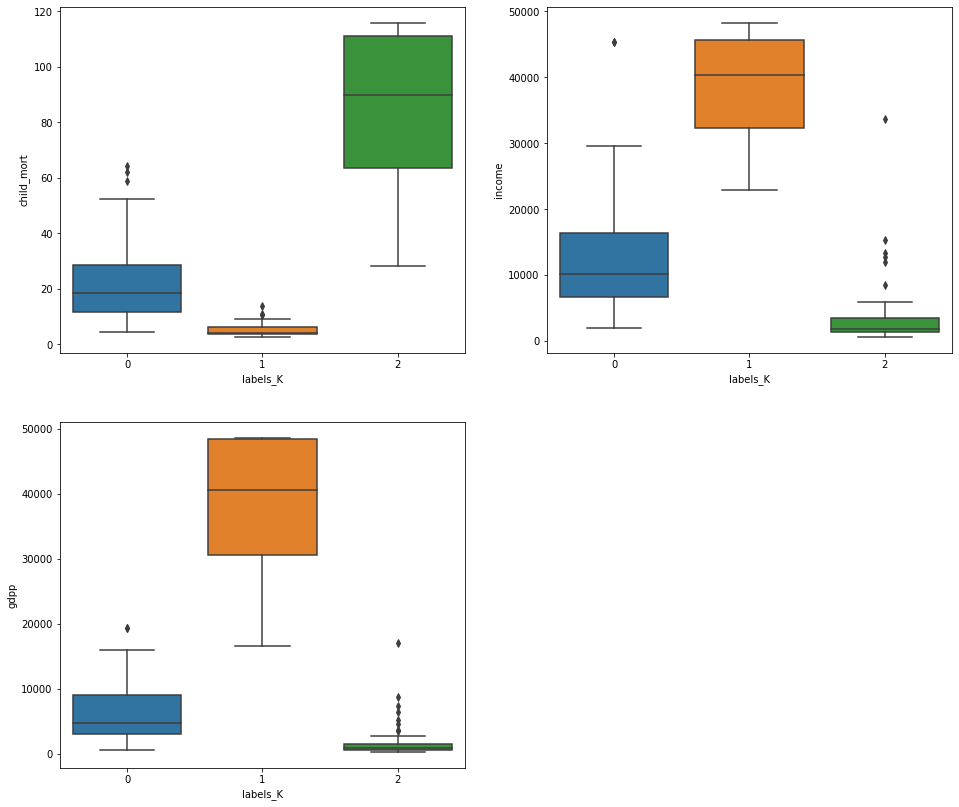

In [29]:
plt.figure(figsize = (16,14))
plt.subplot(2,2,1)
sns.boxplot(x= 'labels_K', y= 'child_mort', data= countries_KM)
plt.subplot(2,2,2)
sns.boxplot(x= 'labels_K', y= 'income', data= countries_KM)
plt.subplot(2,2,3)
sns.boxplot(x= 'labels_K', y= 'gdpp', data= countries_KM)
plt.show()

- **Cluster group with label 2 has low gdpp, low income and high child mortality rate. SO this is a group of countries we really need to target.**
- On the other hand cluster group with label 1 has high income, high gdpp and low child mortality rate so this is a wealthy group of countries we can say.

In [30]:
# sorting top 10 countries with low gdpp, high child_mort, low income

List_1 = countries_KM.loc[countries_KM['labels_K']==2].sort_values(by=['gdpp', 'child_mort', 'income'], ascending = [True, False, True])
List_1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_K
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,2
112,Niger,116.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,2
132,Sierra Leone,116.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.600,413,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.560,419,2
31,Central African Republic,116.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.310,459,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.610,482,2


### Final list of countries with K-Means clustering

In [31]:
List_K = pd.DataFrame()
List_K['Country'] = List_1.country.values
List_K.index = np.arange(1, len(List_K) + 1)
List_K

,Country
1,Burundi
2,Liberia
3,"Congo, Dem. Rep."
4,Niger
5,Sierra Leone
6,Madagascar
7,Mozambique
8,Central African Republic
9,Malawi
10,Eritrea


### Method 2 - Hierachical Clustering

In [32]:
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479341,-0.669581,-0.629435,-0.732729,-0.958349,0.394438,-1.697955,2.016421,-0.757362
1,-0.559029,-0.542172,-0.473489,-0.472182,-0.394006,-0.383226,0.669429,-0.880535,-0.523321
2,-0.262690,-0.475838,-0.530017,-0.560152,-0.192552,1.440750,0.692986,-0.019090,-0.498838
3,2.193878,-0.418960,-0.588935,-0.543087,-0.667360,2.190136,-1.238612,2.044904,-0.560376
4,-0.733509,-0.027134,-0.150685,0.306422,0.227992,-0.862393,0.728320,-0.547072,0.013312


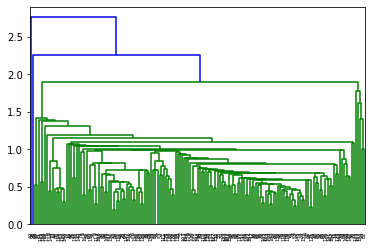

In [33]:
# single linkage method

merging_1 = linkage(countries_scaled, method = 'single', metric= 'euclidean')
dendrogram(merging_1)
plt.show()

**From single linkage we are not able to make strong prediction for number of clusters, so we will now go with complete linkage method.**

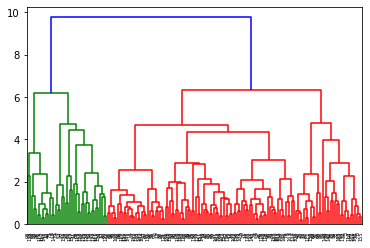

In [34]:
# complete linkage

merging_2 = linkage(countries_scaled, method = 'complete', metric = 'euclidean')
dendrogram(merging_2)
plt.show()

**Complete linkage gives clear dendrogram. We can cut this dendrogram at height 6 to get 4 clusters.**


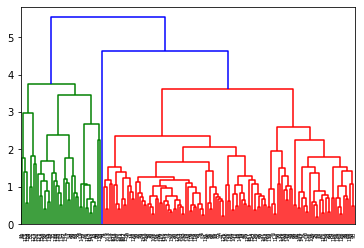

In [35]:
# average linkage

merging_3 = linkage(countries_scaled, method = 'average', metric = 'euclidean')
dendrogram(merging_3)
plt.show()

**Average linkage method also gives us better results, but this method creates time complexity. Also complete linkage is giving better results**

In [36]:
labels_H = cut_tree(merging_2, n_clusters =4).reshape(-1, )
labels_H

array([0, 1, 1, 0, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2,
       3, 1, 1, 1, 1, 0, 1, 1, 1, 3, 2, 0, 1, 1, 3, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 3, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 2, 1, 3, 1, 1, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 2, 0, 0, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 3, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [37]:
countries_H = countries_df.copy()

In [38]:
countries_H['labels_H'] = labels_H
countries_H.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_H
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,1
3,Angola,116.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,1


## 5.2) Final analysis using Hierarchical

In [39]:
countries_H.labels_H.value_counts()

1    94
0    33
2    26
3    14
Name: labels_H, dtype: int64

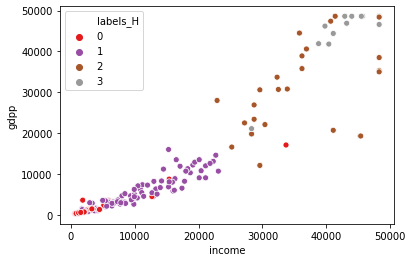

In [40]:
sns.scatterplot(x = "income" , y = "gdpp", hue = 'labels_H', data = countries_H, palette = "Set1")

- Cluster group with label 0 has low income and low gdpp rate

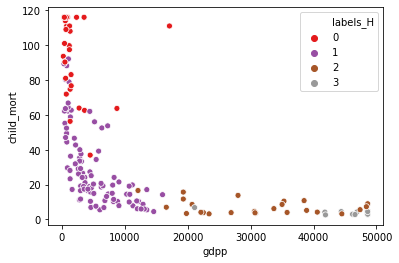

In [41]:
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'labels_H', data = countries_H, palette = "Set1")

- Cluster group with label 0 has high child mortality rate for low gdpp

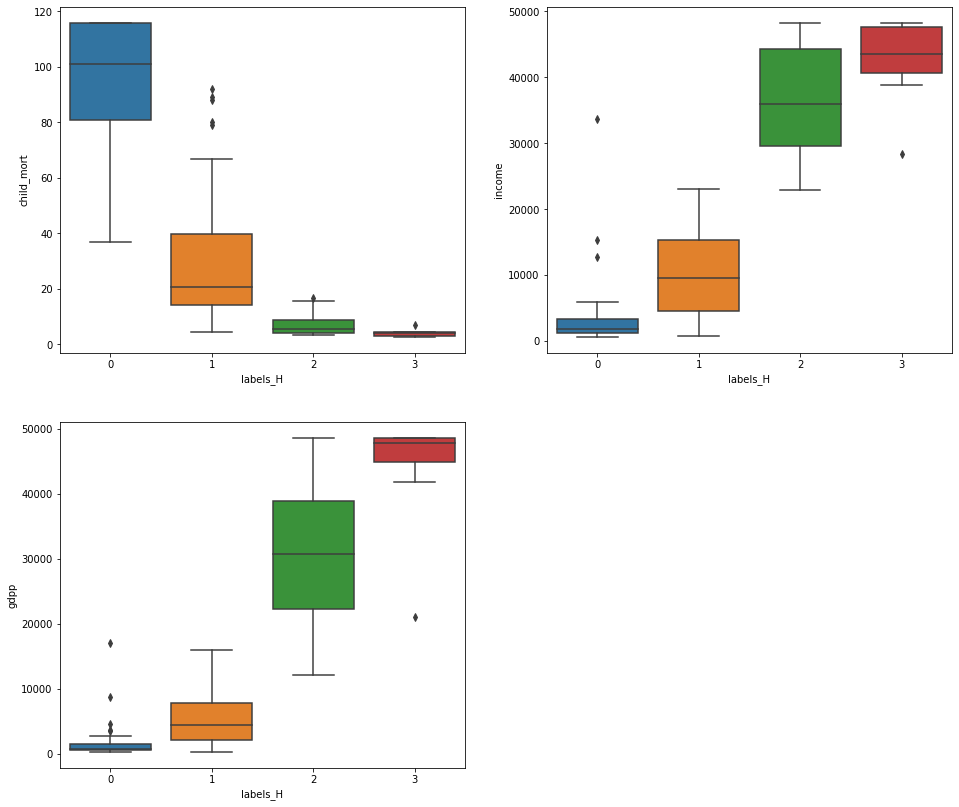

In [42]:
plt.figure(figsize = (16,14))
plt.subplot(2,2,1)
sns.boxplot(x= 'labels_H', y= 'child_mort', data= countries_H)
plt.subplot(2,2,2)
sns.boxplot(x= 'labels_H', y= 'income', data= countries_H)
plt.subplot(2,2,3)
sns.boxplot(x= 'labels_H', y= 'gdpp', data= countries_H)
plt.show()

- **Cluster group with label 0 has low gdpp, low income and high child mortality rate. SO this is a group of countries we really need to target.**
- On the other hand cluster group with label 3 has high income, high gdpp and low child mortality rate so this is a wealthy group of countries we can say.

In [43]:
# sorting top 10 countries with low gdpp, high child_mort, low income

List_2 = countries_H.loc[(countries_H.labels_H == 0 )].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True])

List_2.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_H
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,0
112,Niger,116.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,0
132,Sierra Leone,116.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.560,419,0
31,Central African Republic,116.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.310,459,0
150,Togo,90.3,196.1760,37.3320,279.624,1210.0,1.18,58.7,4.870,488,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.97,55.6,5.050,547,0
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.44,56.2,5.820,553,0


### Final list of countries with Hierarchical clustering

In [44]:
List_H = pd.DataFrame()
List_H['Country'] = List_2.country.values
List_H.index = np.arange(1, len(List_H) + 1)
List_H

,Country
1,Burundi
2,"Congo, Dem. Rep."
3,Niger
4,Sierra Leone
5,Mozambique
6,Central African Republic
7,Malawi
8,Togo
9,Guinea-Bissau
10,Afghanistan


### Top 10 Countries to target as per K-Means clustering :

1. 'Burundi'
2. 'Liberia' 
3. 'Congo, Dem. Rep.'
4. 'Niger'
5. 'Sierra Leone'
6. 'Madagascar'
7. 'Mozambique'
8. 'Central African Republic'
9. 'Malawi'
10. 'Eritrea'

### Top 10 countries to target as per Hierarchical clustering :

1. 'Burundi'
2. 'Congo, Dem. Rep.'
3. 'Niger.'
4. 'Sierra Leone'
5. 'Mozambique'
6. 'Central African Republic'
7. 'Malawi'
8. 'Togo'
9. 'Guinea-Bissau'
10. 'Afghanistan'